# Tugas 6 PCD - Fast Fourier Transform
- Nama : Abdullah Mu'adz Muflih
- NIM  : 1306620078

### Tugas
- Mencari gambar dari internet
- Lakukan transformasi FFT
- Plot FFT Spectrum dan Phase Spectrum
- Transformasi balik ke gambar semula
- Variasikan treshold, sehingga gambar hancur

In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import seaborn as sns
from scipy.fft import fft, fftfreq

### Upload Gambar

<function matplotlib.pyplot.show(close=None, block=None)>

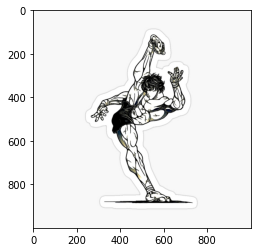

In [2]:
im1 = Image.open('Baki.jpg')
plt.imshow(im1)
plt.show

#### Ubah warna gambar menjadi grayscale

In [3]:
im1 = im1.convert('L')
im1 = np.array(im1)

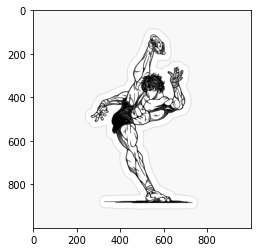

In [4]:
plt.imshow(im1, cmap='gray')
plt.show()

#### Mengecek tipe data dan isi data citra

In [5]:
im1.shape

(1000, 1000)

In [6]:
im1.dtype

dtype('uint8')

In [7]:
im1

array([[248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248],
       ...,
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248],
       [248, 248, 248, ..., 248, 248, 248]], dtype=uint8)

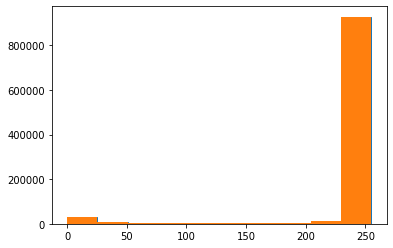

In [8]:
counts, bins = np.histogram(im1)
plt.stairs(counts, bins)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

### Lakukan transformasi FFT, Plot FFT Spectrum dan Phase Spectrum, dan Transformasi balik ke gambar semula

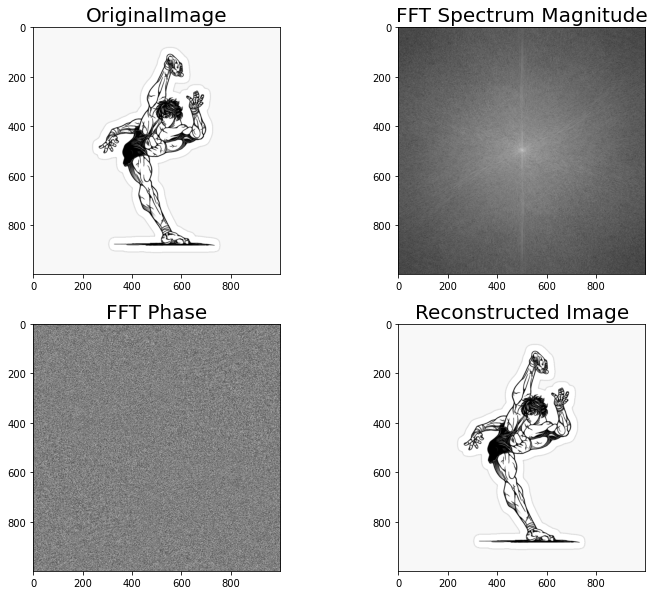

In [9]:
plt.figure(figsize=(12,10))
freq1 = fp.fft2(im1)
im1_ = np.abs(fp.ifft2(freq1).real)
plt.subplot(2,2,1)
plt.imshow(im1, cmap='gray')
plt.title('OriginalImage', size=20)
plt.subplot(2,2,2)
plt.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(freq1))), cmap='gray')
plt.title('FFT Spectrum Magnitude', size=20)
plt.subplot(2,2,3)
plt.imshow(np.angle(fp.fftshift(freq1)),cmap='gray')
plt.title('FFT Phase', size=20)
plt.subplot(2,2,4)
plt.imshow(np.clip(im1_,0,255), cmap='gray')
plt.title('Reconstructed Image', size=20)
plt.show()

#### Mengecek tipe data dan isi data citra

In [10]:
f1_real = freq1.real

In [11]:
f1_real.dtype

dtype('float64')

In [21]:
np.abs(f1_real).max()

236695178.0

In [22]:
np.abs(f1_real).min()

0.0012239448351465398

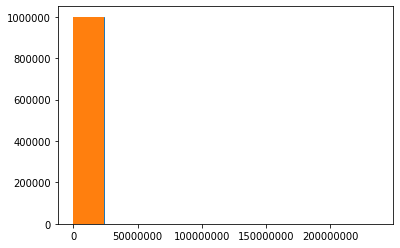

In [36]:
im1_abs = np.abs(f1_real)

counts, bins = np.histogram(im1_abs)
plt.stairs(counts, bins)
plt.hist(bins[:-1], bins, weights=counts)
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

### Variasikan treshold, sehingga gambar hancur

In [27]:
def tresh(data,n):
    freq = fp.fft2(data)
    freq = np.abs(freq.real)
    plt.figure(figsize=(10,10))
    d_tresh = np.where(freq < n, 0, data)
    d_inv = fp.ifft2(d_tresh)
    d_inv = np.clip(d_tresh,0,255)
    plt.subplot(1,2,1)
    plt.imshow(data, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(d_inv, cmap='gray')
    plt.title(f'treshold x < {n}')

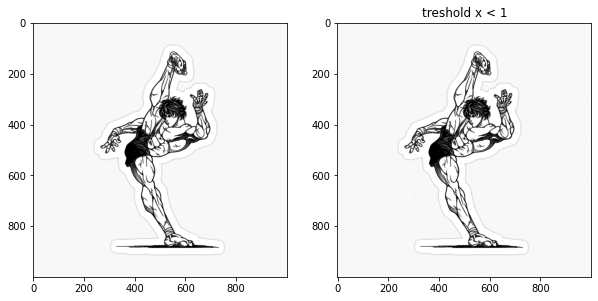

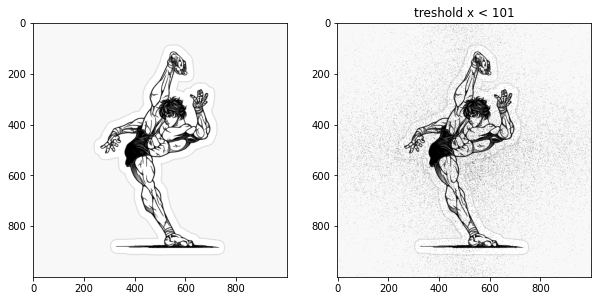

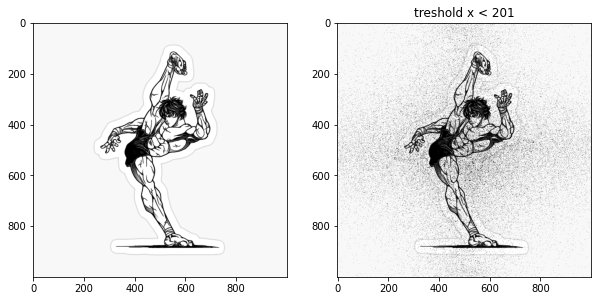

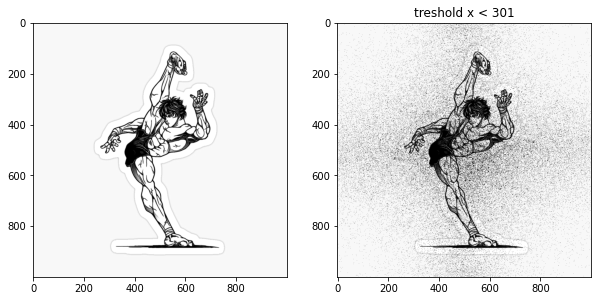

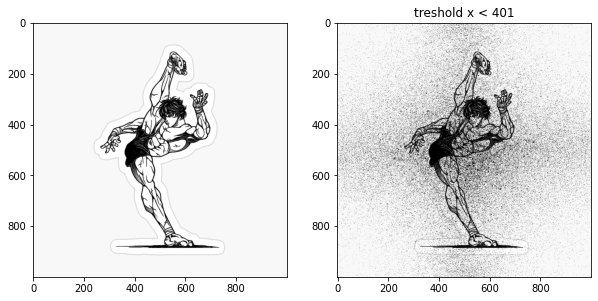

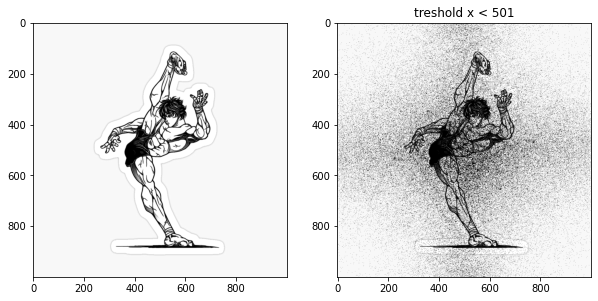

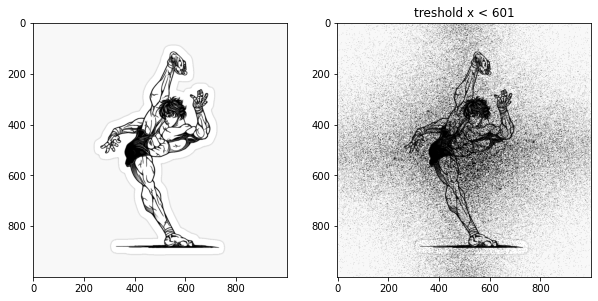

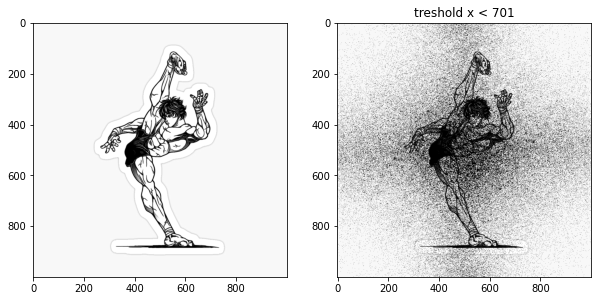

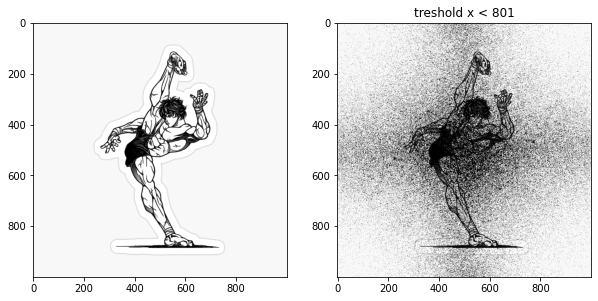

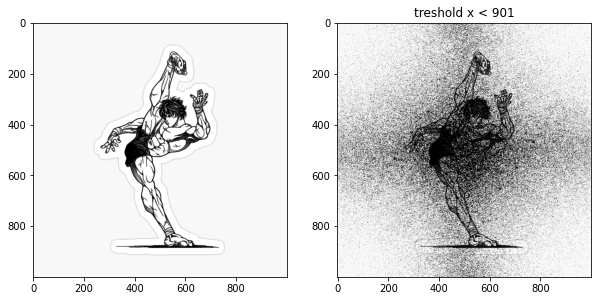

In [28]:
for i in np.arange(1,1001,100):
    tresh(im1,i)

### Refrensi

- https://note.nkmk.me/en/python-numpy-where/
- https://docs.scipy.org/doc/scipy/tutorial/fft.html
- https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html